In [1]:
import pandas as  pd
import numpy as np

In [2]:
df = pd.read_csv("noida_house.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Flat No.      4460 non-null   int64 
 1   Area in Sqrt  4460 non-null   int64 
 2   No.of Bhk     4460 non-null   int64 
 3   Location      4460 non-null   object
 4   Price         4460 non-null   object
dtypes: int64(3), object(2)
memory usage: 174.3+ KB


In [4]:
df.head()

,Flat No.,Area in Sqrt,No.of Bhk,Location,Price
0,0,3720,4,"Sector 107, Noida",3.9 Cr
1,1,1625,3,"Sector 50, Noida",1.15 Cr
2,2,1325,3,"Sector 120, Noida",60 L
3,3,650,1,"Sector 73, Noida",19 L
4,4,950,2,"Phase 2 Noida Extension, Noida",25.99 L


In [5]:
location_counts = df["Location"].value_counts()

In [6]:
rare_locations = location_counts[location_counts < 10]

# See how many such rare locations exist
print(f"Number of locations with less than 10 entries: {len(rare_locations)}")

# Optionally display them
print(rare_locations)

Number of locations with less than 10 entries: 50
Location
Phase 2 Noida Extension, Noida                            9
Sector 14, Noida                                          9
Sector 22D Yamuna Expressway, Noida                       8
Sector-106 Noida, Noida                                   8
Sector 40, Noida                                          7
Sector 46, Noida                                          7
Sector 61, Noida                                          7
Urbainia Trinity Noida Extension Yakubpur Noida, Noida    7
Sector 39, Noida                                          6
Sector 151, Noida                                         6
Sector 19, Noida                                          6
Sector 149, Noida                                         6
Sector 118, Noida                                         6
Sector 34, Noida                                          6
rho 2, Noida                                              5
Sector 51, Noida                         

In [7]:
df.describe()

,Flat No.,Area in Sqrt,No.of Bhk
count,4460.00000,4460.000000,4460.000000
mean,2229.50000,1983.312332,2.907175
std,1287.63543,1372.932820,1.087717
min,0.00000,434.000000,1.000000
25%,1114.75000,1050.000000,2.000000
50%,2229.50000,1550.000000,3.000000
75%,3344.25000,2500.000000,3.000000
max,4459.00000,15000.000000,10.000000


In [8]:
df["No.of Bhk"].value_counts()

No.of Bhk
3     1774
2     1343
4      875
1      262
5      142
6       20
8       14
7       13
10      10
9        7
Name: count, dtype: int64

In [9]:
def clean_price(price_str):
    """Convert price strings like '3.9 Cr', '60 L', '2500000' into Lakhs."""
    try:
        if pd.isna(price_str):
            return None
        price_str = str(price_str).replace(',', '').strip().lower()
        if 'cr' in price_str:
            return float(price_str.replace('cr', '').strip()) * 100
        elif 'l' in price_str:
            return float(price_str.replace('l', '').strip())
        else:
            return float(price_str) / 100000  # assume plain rupees
    except:
        return None

In [10]:
def extract_location(location_str):
    if pd.isna(location_str):  # agar value NaN ho to None return karo
        return None
    location_str = str(location_str)  # value ko string mein convert karo
    return location_str.split(',')[0].strip()  # comma ke pehle wali value lo aur space hatao


def clean_house_data(df):
    """Clean Location and Price columns in house dataset."""
    df = df.copy()
    df['Location'] = df['Location'].apply(extract_location)
    df['Price'] = df['Price'].apply(clean_price)
    return df

In [11]:
df.head()

,Flat No.,Area in Sqrt,No.of Bhk,Location,Price
0,0,3720,4,"Sector 107, Noida",3.9 Cr
1,1,1625,3,"Sector 50, Noida",1.15 Cr
2,2,1325,3,"Sector 120, Noida",60 L
3,3,650,1,"Sector 73, Noida",19 L
4,4,950,2,"Phase 2 Noida Extension, Noida",25.99 L


In [12]:
df = clean_house_data(df)
df.head()


,Flat No.,Area in Sqrt,No.of Bhk,Location,Price
0,0,3720,4,Sector 107,390.00
1,1,1625,3,Sector 50,115.00
2,2,1325,3,Sector 120,60.00
3,3,650,1,Sector 73,19.00
4,4,950,2,Phase 2 Noida Extension,25.99


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Flat No.      4460 non-null   int64  
 1   Area in Sqrt  4460 non-null   int64  
 2   No.of Bhk     4460 non-null   int64  
 3   Location      4460 non-null   object 
 4   Price         4460 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 174.3+ KB


In [14]:
location_counts = df['Location'].value_counts()
rare_locations = location_counts[location_counts < 10]
print(rare_locations)
print(f"\nTotal rare locations (<10 listings): {len(rare_locations)}")


Location
Phase 2 Noida Extension                            9
Sector 14                                          9
Sector 22D Yamuna Expressway                       8
Sector-106 Noida                                   8
Sector 40                                          7
Sector 46                                          7
Sector 61                                          7
Urbainia Trinity Noida Extension Yakubpur Noida    7
Sector 39                                          6
Sector 151                                         6
Sector 19                                          6
Sector 149                                         6
Sector 118                                         6
Sector 34                                          6
rho 2                                              5
Sector 51                                          5
Sector 113                                         5
Sector 168                                         5
Sector 16B                           

In [15]:
df['Location'] = df['Location'].apply(
    lambda x: 'Other' if x in rare_locations else x
)


In [16]:
df.head()

,Flat No.,Area in Sqrt,No.of Bhk,Location,Price
0,0,3720,4,Sector 107,390.00
1,1,1625,3,Sector 50,115.00
2,2,1325,3,Sector 120,60.00
3,3,650,1,Sector 73,19.00
4,4,950,2,Other,25.99


In [17]:
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
df = df[['Area in Sqrt', 'No.of Bhk', 'Location', 'Price']]

# Drop rows with missing prices
df.dropna(inplace=True)

# Encode location
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])


In [24]:
df["Location"].unique()

array([ 4, 28,  8, 31,  0, 16, 14, 35, 29, 23, 33, 37, 10, 32, 17, 36,  5,
       15, 27, 39, 41, 12, 21,  3, 25, 34,  9, 26, 24, 19, 30, 40,  6,  1,
       18, 22, 38, 11,  2, 13, 20,  7])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score



In [20]:
df.to_csv("clean_data_csv")

In [21]:
X = df.drop(columns=["Price"])
y= df["Price"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)
print("y_train shape:", Y_train.shape)
print("y_test shape:", Y_test.shape)


x_train shape: (3568, 3)
x_test shape: (892, 3)


NameError: name 'Y_train' is not defined

In [ ]:
column_transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ["Location"]),
    remainder='passthrough'
)

In [ ]:
scaler = StandardScaler()

In [ ]:
lr = LinearRegression()

In [ ]:
pipe = make_pipeline(column_transformer , scaler, lr)

In [ ]:
pipe.fit(x_train , y_train)

In [28]:
print(X_train.shape, y_train.shape)  # Should be (N, features) and (N,)

(3568, 3) (3568,)


In [ ]:
y_pred_lr = pipe.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_lr)

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))


0.9177431623245932


In [ ]:
import pickle

In [ ]:
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
df.head()

In [ ]:
location_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))


In [ ]:
with open('location_mapping.pkl', 'wb') as f:
    pickle.dump(location_mapping, f)


In [ ]:
df["Area in Sqrt"].value_counts()

In [ ]:
df.info()

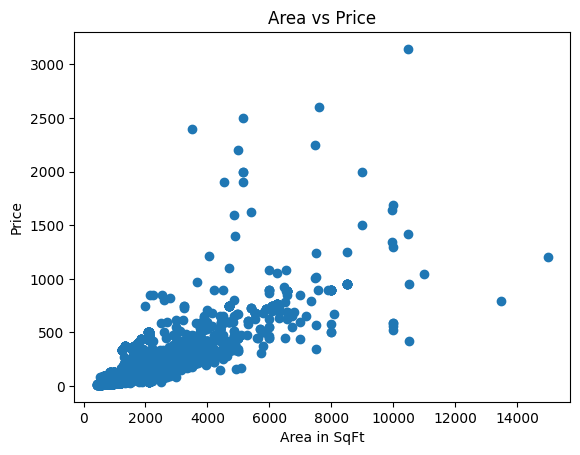

In [29]:
import matplotlib.pyplot as plt

plt.scatter(df['Area in Sqrt'], df['Price'])
plt.xlabel('Area in SqFt')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()


In [ ]:
# Feature importance after training
features = ['Area in Sqrt', 'No.of Bhk', 'Location']
importances = model.feature_importances_

for name, score in zip(features, importances):
    print(f"{name}: {score:.4f}")


In [ ]:
# One-hot encode location
df = pd.get_dummies(df, columns=['Location'], drop_first=True)


In [ ]:
df.head()

In [ ]:
df = pd.get_dummies(df, columns=['Location'], prefix='Location', drop_first=False)


In [27]:
df.copy()

,Area in Sqrt,No.of Bhk,Location,Price
0,3720,4,4,390.00
1,1625,3,28,115.00
2,1325,3,8,60.00
3,650,1,31,19.00
4,950,2,0,25.99
...,...,...,...,...
4455,2190,3,16,180.00
4456,1500,3,27,47.00
4457,1700,4,27,65.00
4458,1050,2,27,32.50


In [30]:
print("Train Score:", rfr.score(X_train, y_train))
print("Test Score :", rfr.score(X_test, y_test))


NameError: name 'rfr' is not defined

In [33]:
new_data = pd.DataFrame([{
    'Location': 'Sector 150, Noida',
    'Size': 3,
    'Bath': 2
}])

predicted_price = model.predict(new_data)
print(f"Predicted House Price: ₹{predicted_price[0]:,.2f}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Bath
- Size
Feature names seen at fit time, yet now missing:
- Area in Sqrt
- No.of Bhk
